In [2]:
# Türkçe olan kısımları ben ekledim, diğer her şey kaynaktan alınmıştır.
'''Trains a simple convnet on the MNIST dataset.
 
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''
 
from __future__ import print_function
import keras
# MNIST verisini ayrıca indirmemize gerek yok
# Keras sayesinde bu şekilde kolayca alabiliriz
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
 
# Tek seferde ne kadar verimizin ağdan geçeğini belirtir
# RAMimiz yüksekse yüksek tutmakta fayda var, daha hızlı öğrenme sağlar
batch_size = 128
 
# Verimizin kaç sınıfa ayrıldığı 
# Mnist için sıfırdan dokuza kadar 10 veri sınıfımız var
num_classes = 10
 
# Verimiz yapay sinir ağı üzerinden kaç kez geçecek.
# Kaynakta 12 epoch olarak verilmiş fakat hızlı olması için 2 epochda bitiriyorum
epochs = 2
 
# input image dimensions
img_rows, img_cols = 28, 28
 
# Veri 4 parçaya bölünmüş olarak ve 
# Her bir görsel için 28x28 boyutunda bir matris olarak verimizi alabiliriz
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
# Veriyi channel bilgisine göre tekrar düzenliyoruz.
# Tensorflow ve Theano farklı veri şekilleri ile çalışıyorlar 
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
 
# y değerlerimiz x verimizin hangi rakama yani hangi sınıfa ait olduğunu tutan rakamlardı
# Yani y verilerimizin birinci boyutu x içerisindeki indexe karşılık gelirken
# ikinci boyutu 0 indexi alabiliyor ve y, 0-9 aralığında tek değer alabiliyordu
# Burada to_categorical metodu ile verimizin ikinci boyutunu sıfır ve birlerden oluşan
# 10 değer alabilecek şekilde genişletiyoruz.
# Örneğin bir verimizin y değeri 8 ise, yeni şekliyle 9 adet sıfır ve 
# yedinci(indexler sıfırdan başladığı için sekizinci değil) indexi 1 olacak hale getiriyoruz
 
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
 
# Keras Sequential sınıfı Yapay sinir ağımızın temelidir
# Bu sınıfa istediğimiz kadar katman ekleyerek tüm ağı oluşturabiliriz
# Hangi katmanı ne zaman eklenmesi gerektiği ile ilgili, 
# en az kayıp vereni bulana kadar deneme-yanılma yapılır
 
model = Sequential()
 
# Buradaki adımları aşağıda açıklamaya çalıştım
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
 
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11501568/11490434 [==============================] - 3s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
28416/60000 [=============>................] - ETA: 1:22 - loss: 0.4116 - acc: 0.8714

60000/60000 [==============================] - 163s 3ms/step - loss: 0.2664 - acc: 0.9181 - val_loss: 0.0585 - val_acc: 0.9819
Epoch 2/2
45440/60000 [=====================>........] - ETA: 38s - loss: 0.0930 - acc: 0.9719

60000/60000 [==============================] - 164s 3ms/step - loss: 0.0909 - acc: 0.9727 - val_loss: 0.0405 - val_acc: 0.9867
Test loss: 0.04045355330412276
Test accuracy: 0.9867


TypeError: ignored

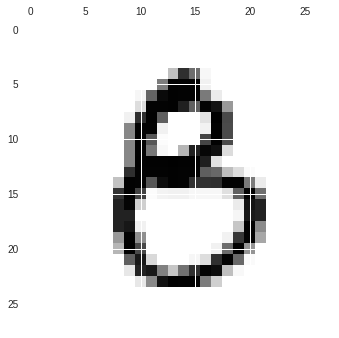

In [5]:
import numpy as np
import matplotlib.pyplot as plt

testVerisiTahminler = model.predict(x_test)
idx = 800
plt.matshow(np.reshape(x_test[idx], (28, 28)))

print("CNN sonucu: %d" % testVerisiTahminler[idx])
print("Beklenen: %d" % y_test[idx])